# Forbes Billionaires of 2021

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

# Options and Settings

In [2]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.figsize'] = [12, 9]
plt.rcParams['font.size'] = 12
path = os.getcwd()                                         # get current working directory
warnings.simplefilter('ignore')

# Import Data

In [3]:
filepath = os.path.join('datasets', 'Billionaire.csv')
df = pd.read_csv(filepath)

# Head and Tail

In [4]:
df

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,$177 B,United States,Amazon,1,57.0,Technology
1,Elon Musk,$151 B,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,$150 B,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,$124 B,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,$97 B,United States,Facebook,5,36.0,Technology
...,...,...,...,...,...,...,...
2750,Daniel Yong Zhang,$1 B,China,e-commerce,2674,49.0,Technology
2751,Zhang Yuqiang,$1 B,China,Fiberglass,2674,65.0,Manufacturing
2752,Zhao Meiguang,$1 B,China,gold mining,2674,58.0,Metals & Mining
2753,Zhong Naixiong,$1 B,China,conglomerate,2674,58.0,Diversified


In [5]:
df.shape

(2755, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2755 entries, 0 to 2754
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      2755 non-null   object 
 1   NetWorth  2755 non-null   object 
 2   Country   2755 non-null   object 
 3   Source    2755 non-null   object 
 4   Rank      2755 non-null   int64  
 5   Age       2676 non-null   float64
 6   Industry  2755 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 150.8+ KB


# Data Cleaning

In [7]:
df['NetWorth'] = df['NetWorth'].str.lstrip('$').str.rstrip(' B')             # strip dollar and billion signs 
df

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,177,United States,Amazon,1,57.0,Technology
1,Elon Musk,151,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,150,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,124,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,97,United States,Facebook,5,36.0,Technology
...,...,...,...,...,...,...,...
2750,Daniel Yong Zhang,1,China,e-commerce,2674,49.0,Technology
2751,Zhang Yuqiang,1,China,Fiberglass,2674,65.0,Manufacturing
2752,Zhao Meiguang,1,China,gold mining,2674,58.0,Metals & Mining
2753,Zhong Naixiong,1,China,conglomerate,2674,58.0,Diversified


# Missing Data Exploration

In [8]:
df.isna().sum()

Name         0
NetWorth     0
Country      0
Source       0
Rank         0
Age         79
Industry     0
dtype: int64

In [9]:
df[df['Age'].isna()]                                                     # 79 billionaires have their ages missing

,Name,NetWorth,Country,Source,Rank,Age,Industry
132,Hinduja brothers,14.9,United Kingdom,diversified,133,NaN,Diversified
255,Lam Wai-ying,9.1,Hong Kong,smartphone screens,256,NaN,Manufacturing
268,Chan Tan Ching-fen,8.8,Hong Kong,real estate,269,NaN,Real Estate
285,Anthony von Mandl,8.7,Canada,alcoholic beverages,274,NaN,Food & Beverage
294,Kuldip Singh & Gurbachan Singh Dhingra,8.4,India,paints,294,NaN,Manufacturing
...,...,...,...,...,...,...,...
2580,Lai Baosheng,1.1,China,consumer technology,2524,NaN,Technology
2639,Tseng Sing-ai,1.1,Taiwan,petrochemicals,2524,NaN,Manufacturing
2680,Carmen Daurella Aguilera,1,Spain,Coca-Cola bottler,2674,NaN,Food & Beverage
2714,Michael McCain,1,Canada,packaged meats,2674,NaN,Food & Beverage


In [10]:
df1 = df[['Name', 'NetWorth', 'Country', 'Source', 'Rank', 'Industry']]
df1.head()

,Name,NetWorth,Country,Source,Rank,Industry
0,Jeff Bezos,177,United States,Amazon,1,Technology
1,Elon Musk,151,United States,"Tesla, SpaceX",2,Automotive
2,Bernard Arnault & family,150,France,LVMH,3,Fashion & Retail
3,Bill Gates,124,United States,Microsoft,4,Technology
4,Mark Zuckerberg,97,United States,Facebook,5,Technology


# Change Data Types

In [11]:
df1[['Name', 'Country', 'Source', 'Rank', 'Industry']] = df1[['Name', 'Country', 'Source', 'Rank', 'Industry']].astype('category')
df1['NetWorth'] = df1['NetWorth'].astype(float)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2755 entries, 0 to 2754
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Name      2755 non-null   category
 1   NetWorth  2755 non-null   float64 
 2   Country   2755 non-null   category
 3   Source    2755 non-null   category
 4   Rank      2755 non-null   category
 5   Industry  2755 non-null   category
dtypes: category(5), float64(1)
memory usage: 182.0 KB


In [12]:
df1.shape

(2755, 6)

# Exploratory Data Analysis

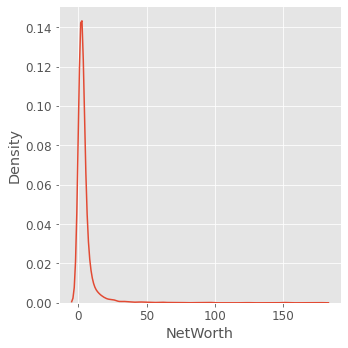

In [13]:
sns.displot(df1, x='NetWorth', kind='kde')     # net worth in billions right skewed - most billionaires have networth <= $25 billion                  

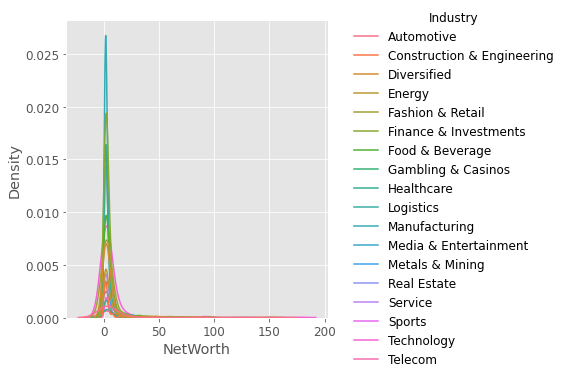

In [14]:
sns.displot(df1, x='NetWorth', kind='kde', hue='Industry')                      # KDE by industry 

# Grouping and Aggregation

In [15]:
# calculate the minimum, mean, maximum and total net worth recorded for each country
df1_gpd_agg = df1.groupby('Country').agg([np.min, np.mean, np.max, np.sum])     
df1_gpd_agg

NetWorth                         
                   amin      mean   amax     sum
Country                                         
Algeria             4.8  4.800000    4.8     4.8
Argentina           1.3  3.060000    6.1    15.3
Australia           1.0  4.125000   23.6   181.5
Austria             1.1  5.225000   26.9    62.7
Belgium             1.1  4.200000   10.0    12.6
...                 ...       ...    ...     ...
United Kingdom      1.0  3.819643   17.0   213.9
United States       1.0  6.075138  177.0  4398.4
Venezuela           3.2  3.200000    3.2     3.2
Vietnam             1.2  2.783333    7.3    16.7
Zimbabwe            1.5  1.500000    1.5     1.5

[70 rows x 4 columns]

Aggregated NetWorth sorted by Countries in Descending Order 

In [16]:
df1_gpd_agg_sortdesc = df1_gpd_agg['NetWorth']['sum'].sort_values(ascending=False).head(20)         # top 20 countries
df1_gpd_agg_sortdesc

Country
United States     4398.4
China             2531.9
Germany            625.5
India              596.4
Russia             586.0
France             512.2
Hong Kong          448.2
Canada             231.1
Japan              225.4
United Kingdom     213.9
Brazil             211.7
Italy              204.5
Sweden             182.0
Australia          181.5
Singapore          156.9
Switzerland        145.5
Spain              137.0
Mexico             136.1
South Korea        121.4
Taiwan             115.6
Name: sum, dtype: float64

Aggregated Net Worth sorted by Countries in Ascending Order 

In [17]:
df1_gpd_agg_sortasc = df1_gpd_agg['NetWorth']['sum'].sort_values(ascending=True).head(20)         # buttom 20 countries
df1_gpd_agg_sortasc

Country
Nepal                   1.4
Zimbabwe                1.5
Tanzania                1.6
St. Kitts and Nevis     1.6
Oman                    2.3
Guernsey                2.6
Hungary                 2.7
Slovakia                2.9
Qatar                   2.9
Macao                   3.1
Venezuela               3.2
Morocco                 3.2
Iceland                 3.2
Eswatini (Swaziland)    4.7
Monaco                  4.8
Algeria                 4.8
Liechtenstein           5.5
Portugal                7.2
Romania                 7.7
Georgia                 8.0
Name: sum, dtype: float64

# Data Visualization

In [18]:
# helper function for formatting plot y-axis
from matplotlib.ticker import FuncFormatter

def trillion(x, pos):
    'The two args are the value and tick position'
    return '%1.1fTn' % (x * 1e-3)

format_trill = FuncFormatter(trillion)


def billion(x, pos):
    'The two args are the value and tick position'
    return '%1.1fB' % (x * 1)

formatter_bill = FuncFormatter(billion)


# helper function for plotting horizontal bar chart with inverted y-axis
def plot_hbar(y, width, color=None, title=None, xlabel=None, ylabel=None, formatter=None):
    # create figure and axis
    fig, ax = plt.subplots()

    # plot bar chart
    ax.barh(y=y, width=width, color=color)

    # Add informative axis label
    ax.set(xlabel=xlabel, ylabel=ylabel, title=title)

    # labels read top-to-bottom
    ax.invert_yaxis()  

    # set x-axis formatter
    ax.xaxis.set_major_formatter(formatter=formatter)  

    return plot_hbar


    # helper function for plotting horizontal bar chart with inverted y-axis
def plot_hbar1(y, width, color=None, title=None, xlabel=None, ylabel=None, formatter=None):
    # Initialize the matplotlib figure
    fig, ax = plt.subplots()

    # plot bar chart
    ax.barh(y=y, width=width, color=color)

    # Add informative axis label
    ax.set(xlabel=xlabel, ylabel=ylabel, title=title)

    # set axis formatter
    ax.xaxis.set_major_formatter(formatter=formatter)

    return plot_hbar1

# Top 20 Countries

<function __main__.plot_hbar(y, width, color=None, title=None, xlabel=None, ylabel=None, formatter=None)>

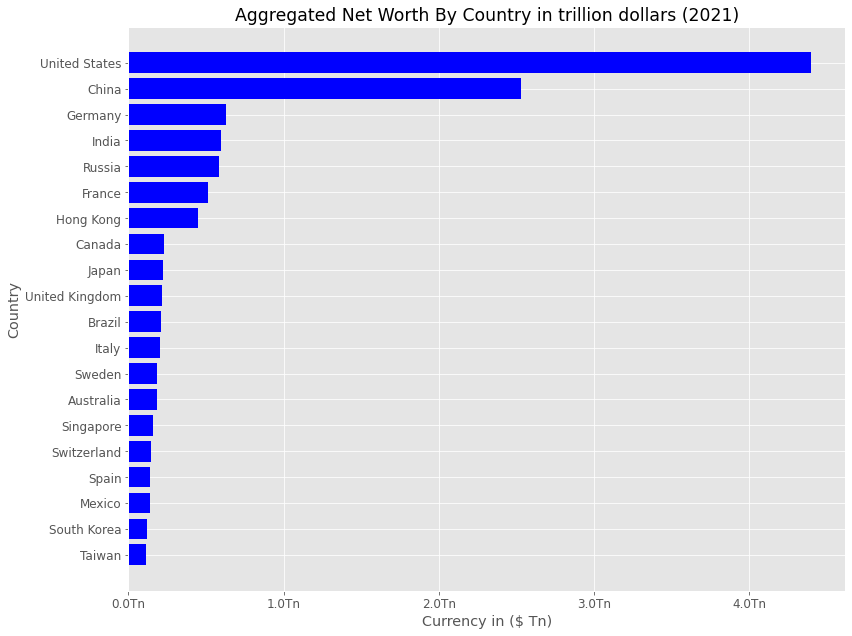

In [19]:
plot_hbar(
    y=df1_gpd_agg_sortdesc.keys(), width=df1_gpd_agg_sortdesc.values, color='blue',
    title='Aggregated Net Worth By Country in trillion dollars (2021)', xlabel='Currency in ($ Tn)', ylabel='Country',
    formatter=format_trill
)

# Bottom 20 Countries

<function __main__.plot_hbar1(y, width, color=None, title=None, xlabel=None, ylabel=None, formatter=None)>

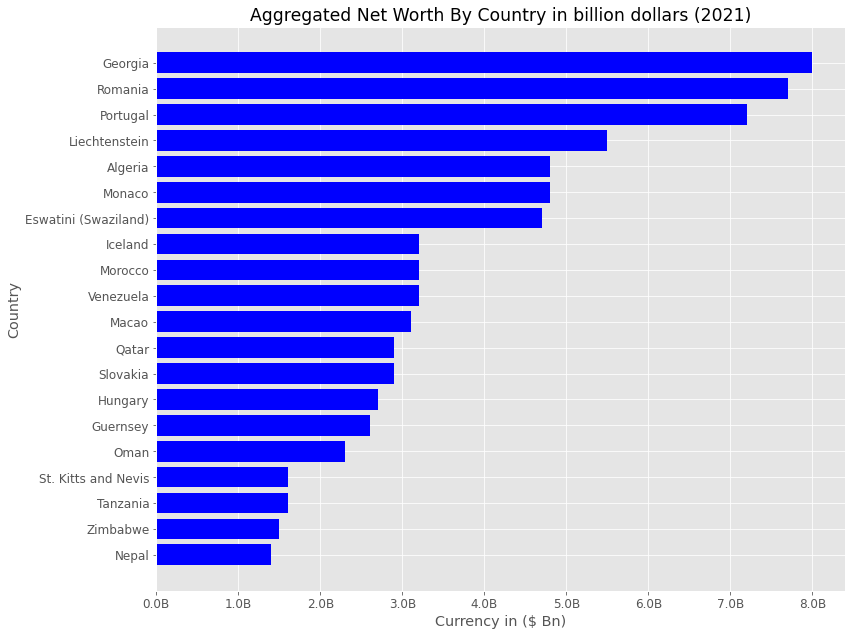

In [20]:
plot_hbar1(
    y=df1_gpd_agg_sortasc.keys(), width=df1_gpd_agg_sortasc.values, color='blue',
    title='Aggregated Net Worth By Country in billion dollars (2021)', xlabel='Currency in ($ Bn)', ylabel='Country',
    formatter=formatter_bill
)

# Top 20 Billionaires Dataframe Exploration

In [21]:
df1_top20_bill = df1[:20]
df1_top20_bill.head()

,Name,NetWorth,Country,Source,Rank,Industry
0,Jeff Bezos,177.0,United States,Amazon,1,Technology
1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,Automotive
2,Bernard Arnault & family,150.0,France,LVMH,3,Fashion & Retail
3,Bill Gates,124.0,United States,Microsoft,4,Technology
4,Mark Zuckerberg,97.0,United States,Facebook,5,Technology


# Data Visualization

In [22]:
# helper function to format x-axis
from matplotlib.ticker import FuncFormatter

def floor(x, pos):
    ''' 
    the function round the rank values to the nearest whole number.
    
    The two args are the value and tick position  
    
    '''
    return round(x)

format_rounded = FuncFormatter(floor)


# create bar plot helper function
def plot_bar(y, width, color=None, title=None, xlabel=None, ylabel=None, formatter=None):
    # create figure and axis
    fig, ax = plt.subplots()
    
    # plot bar chart
    ax.barh(y=y, width=width, color=color)

    # label plots
    ax.set(title=title, xlabel=xlabel, ylabel=ylabel)

    # invert y-axis
    ax.invert_yaxis()

    # set x-axis formatter
    ax.xaxis.set_major_formatter(formatter=formatter)

    return plot_bar

<function __main__.plot_bar(y, width, color=None, title=None, xlabel=None, ylabel=None, formatter=None)>

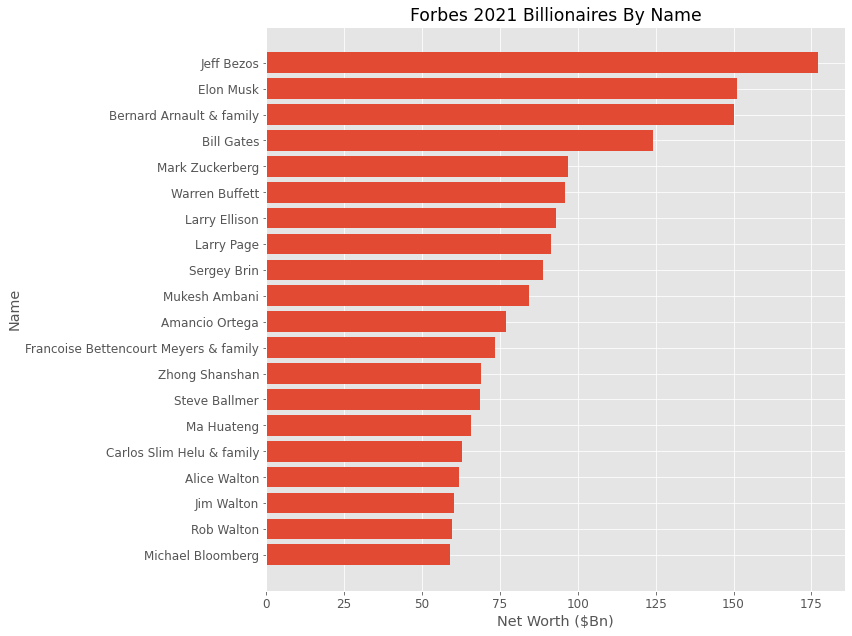

In [23]:
plot_bar(
    y=df1_top20_bill['Name'], width=df1_top20_bill['NetWorth'],
    title='Forbes 2021 Billionaires By Name', xlabel='Net Worth ($Bn)', ylabel='Name', 
    formatter=format_rounded
)

<function __main__.plot_bar(y, width, color=None, title=None, xlabel=None, ylabel=None, formatter=None)>

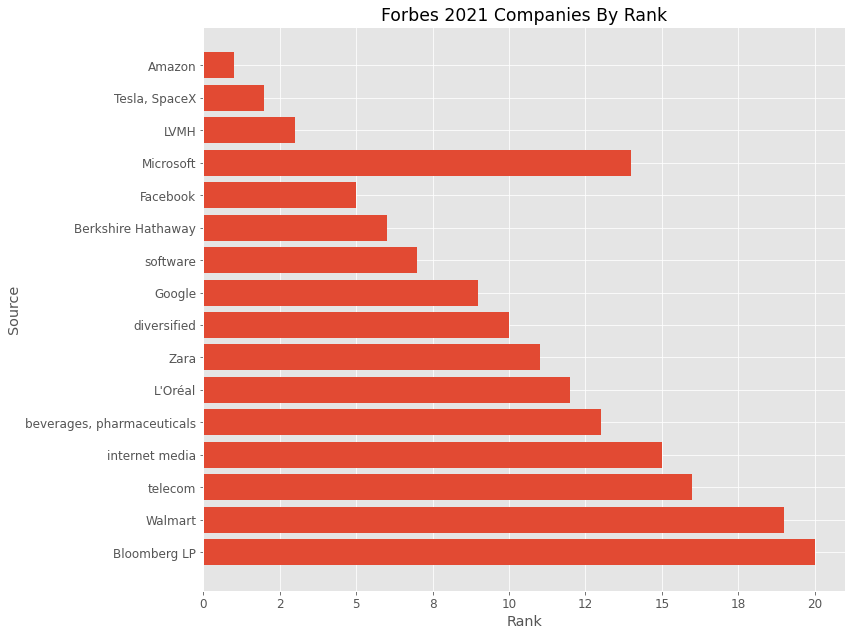

In [24]:
plot_bar(
    y=df1_top20_bill['Source'], width=df1_top20_bill['Rank'],
    title='Forbes 2021 Companies By Rank', xlabel='Rank', ylabel='Source', 
    formatter=format_rounded
)

# Data Grouping By Industry

In [25]:
df1_grpd_agg_ind = df1.groupby('Industry').agg([np.min, np.mean, np.max, np.sum])
df1_grpd_agg_ind

NetWorth                         
                               amin      mean   amax     sum
Industry                                                    
Automotive                      1.0  6.875000  151.0   467.5
Construction & Engineering      1.0  2.843182   14.6   125.1
Diversified                     1.0  4.617553   84.5   868.1
Energy                          1.0  4.526000   28.4   452.6
Fashion & Retail                1.0  6.218315  150.0  1697.6
Finance & Investments           1.0  4.118329   96.0  1527.9
Food & Beverage                 1.0  4.702740   68.9  1029.9
Gambling & Casinos              1.0  5.360000   38.2   134.0
Healthcare                      1.0  3.577828   24.4   790.7
Logistics                       1.3  4.165714   26.3   145.8
Manufacturing                   1.0  3.383384   37.7  1119.9
Media & Entertainment           1.0  5.066316   59.0   481.3
Metals & Mining                 1.0  5.829730   29.1   431.4
Real Estate                     1.0  3.794419   31.7   815.8
Service                         1.0  3.316000   39.0   248.7
Sports                          1.2  3.404167    8.9    81.7
Technology                      1.0  6.730685  177.0  2456.7
Telecom                         1.0  6.543750   62.8   209.4

In [26]:
df1_gprd_agg_ind_sorted = df1_grpd_agg_ind['NetWorth']['sum'].sort_values(ascending=False)              # networth sorted by industry
df1_gprd_agg_ind_sorted

Industry
Technology                    2456.7
Fashion & Retail              1697.6
Finance & Investments         1527.9
Manufacturing                 1119.9
Food & Beverage               1029.9
Diversified                    868.1
Real Estate                    815.8
Healthcare                     790.7
Media & Entertainment          481.3
Automotive                     467.5
Energy                         452.6
Metals & Mining                431.4
Service                        248.7
Telecom                        209.4
Logistics                      145.8
Gambling & Casinos             134.0
Construction & Engineering     125.1
Sports                          81.7
Name: sum, dtype: float64

<function __main__.plot_bar(y, width, color=None, title=None, xlabel=None, ylabel=None, formatter=None)>

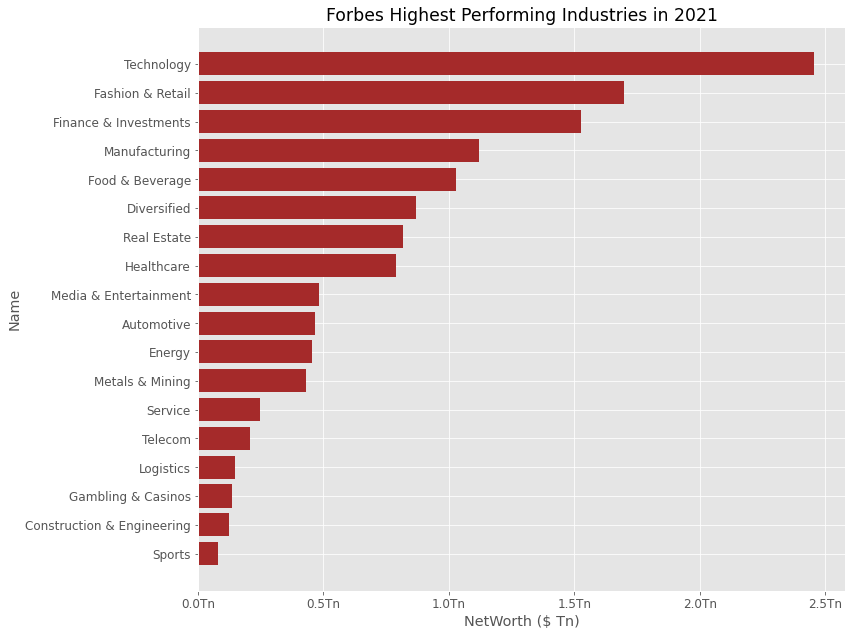

In [27]:
plot_bar(
    y=df1_gprd_agg_ind_sorted.keys(), width=df1_gprd_agg_ind_sorted.values, color='brown',
    title='Forbes Highest Performing Industries in 2021', xlabel='NetWorth ($ Tn)', ylabel='Name', 
    formatter=format_trill
)

# Data Grouping By Country

In [28]:
df1_grpd = df1.groupby('Country')
df1_grpd.head()

,Name,NetWorth,Country,Source,Rank,Industry
0,Jeff Bezos,177.0,United States,Amazon,1,Technology
1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,Automotive
2,Bernard Arnault & family,150.0,France,LVMH,3,Fashion & Retail
3,Bill Gates,124.0,United States,Microsoft,4,Technology
4,Mark Zuckerberg,97.0,United States,Facebook,5,Technology
...,...,...,...,...,...,...
2560,Polys Haji-Ioannou,1.1,Cyprus,EasyJet,2524,Service
2583,Michiel Le Roux,1.1,South Africa,banking,2524,Finance & Investments
2641,Jan Van Geet,1.1,Belgium,real estate developer,2524,Real Estate
2689,Clelia Haji-Ioannou,1.0,Cyprus,EasyJet,2674,Service


# United States Exploration

<function __main__.plot_bar(y, width, color=None, title=None, xlabel=None, ylabel=None, formatter=None)>

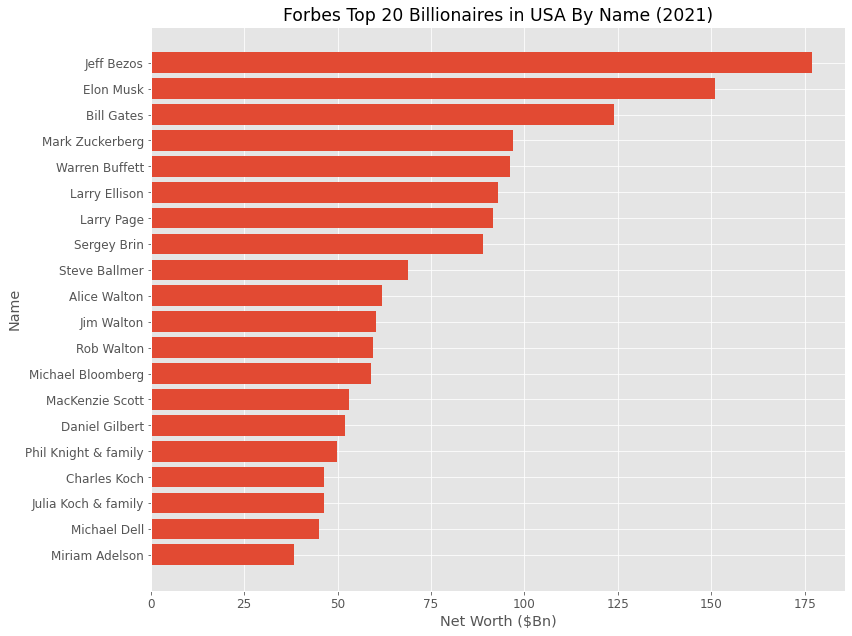

In [29]:
plot_bar(
    y=df1_grpd.get_group('United States')['Name'][:20], width=df1_grpd.get_group('United States')['NetWorth'][:20],
    title='Forbes Top 20 Billionaires in USA By Name (2021)', xlabel='Net Worth ($Bn)', ylabel='Name', 
    formatter=format_rounded
)

<function __main__.plot_bar(y, width, color=None, title=None, xlabel=None, ylabel=None, formatter=None)>

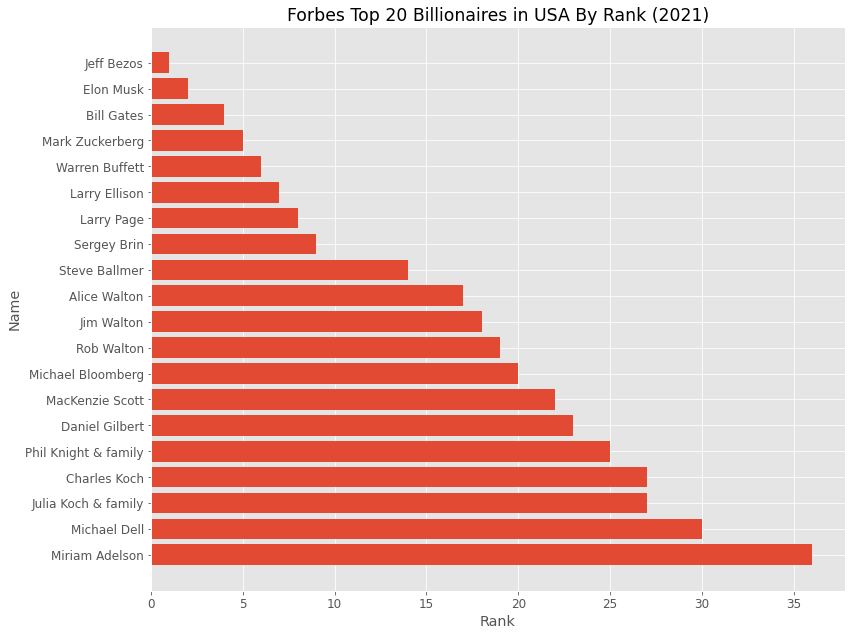

In [30]:
plot_bar(
    y=df1_grpd.get_group('United States')['Name'][:20], width=df1_grpd.get_group('United States')['Rank'][:20],
    title='Forbes Top 20 Billionaires in USA By Rank (2021)', xlabel='Rank', ylabel='Name', 
    formatter=format_rounded
)

<function __main__.plot_bar(y, width, color=None, title=None, xlabel=None, ylabel=None, formatter=None)>

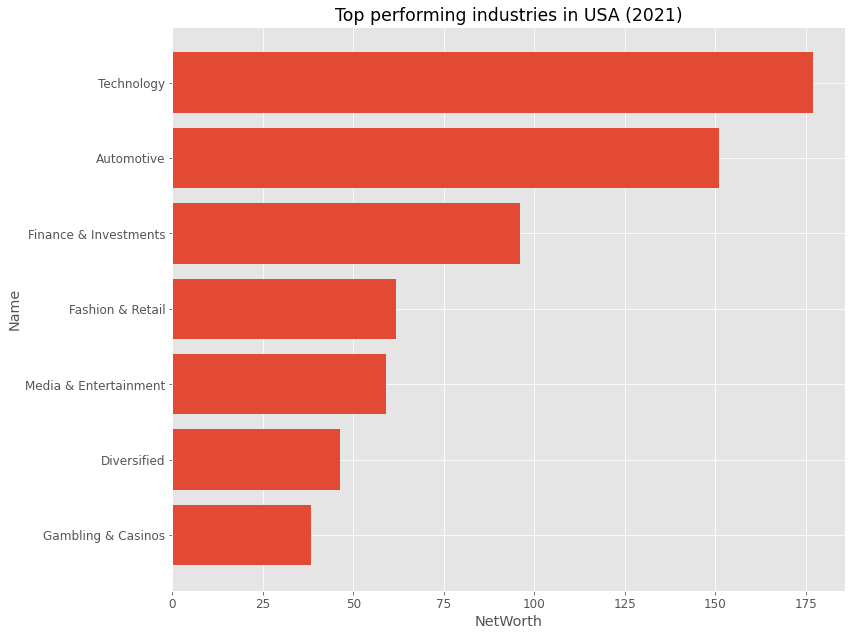

In [31]:
plot_bar(
    y=df1_grpd.get_group('United States')['Industry'][:20], width=df1_grpd.get_group('United States')['NetWorth'][:20],
    title='Top performing industries in USA (2021)', xlabel='NetWorth', ylabel='Name', 
    formatter=format_rounded
)

# Germany Exploration

<function __main__.plot_bar(y, width, color=None, title=None, xlabel=None, ylabel=None, formatter=None)>

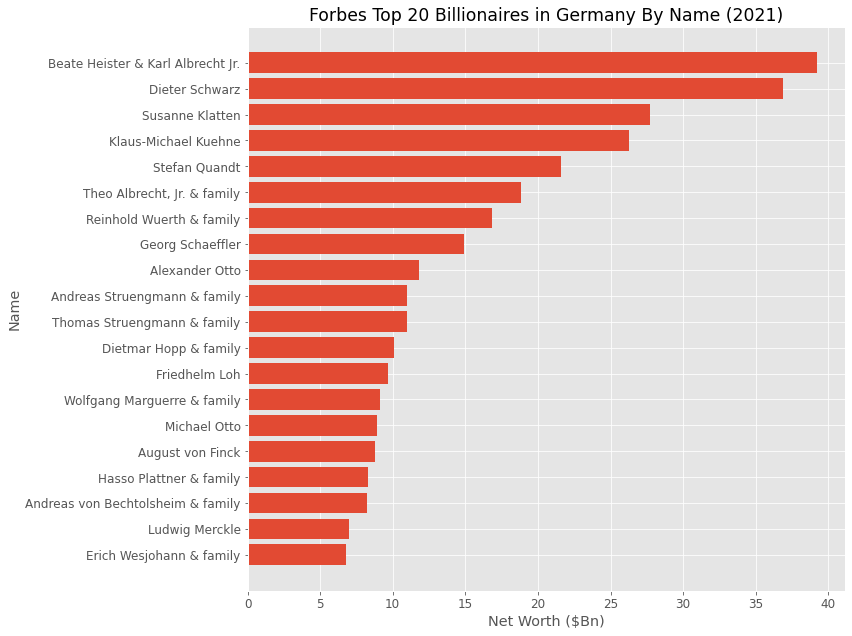

In [32]:
plot_bar(
    y=df1_grpd.get_group('Germany')['Name'][:20], width=df1_grpd.get_group('Germany')['NetWorth'][:20],
    title='Forbes Top 20 Billionaires in Germany By Name (2021)', xlabel='Net Worth ($Bn)', ylabel='Name', 
    formatter=format_rounded
)

<function __main__.plot_bar(y, width, color=None, title=None, xlabel=None, ylabel=None, formatter=None)>

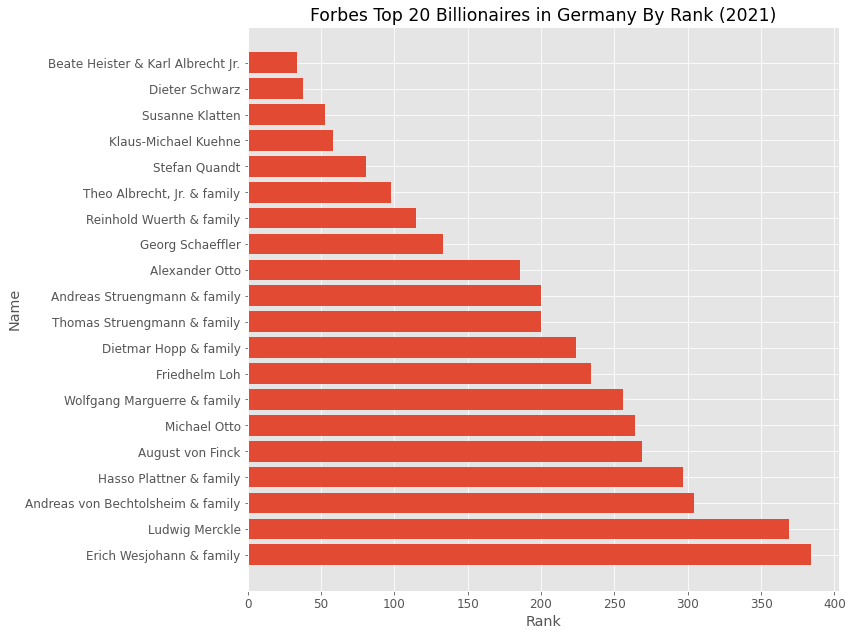

In [33]:
plot_bar(
    y=df1_grpd.get_group('Germany')['Name'][:20], width=df1_grpd.get_group('Germany')['Rank'][:20],
    title='Forbes Top 20 Billionaires in Germany By Rank (2021)', xlabel='Rank', ylabel='Name', 
    formatter=format_rounded
)

<function __main__.plot_bar(y, width, color=None, title=None, xlabel=None, ylabel=None, formatter=None)>

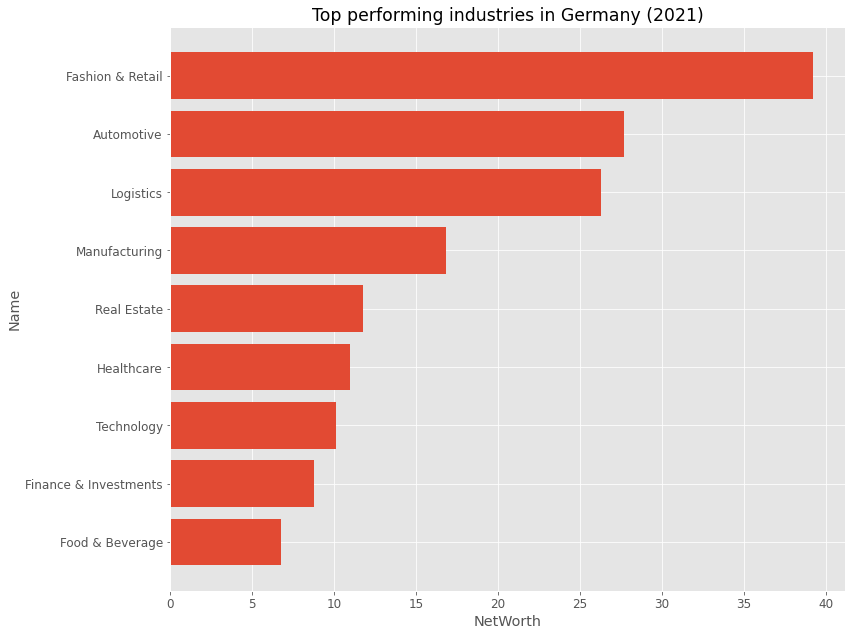

In [34]:
plot_bar(
    y=df1_grpd.get_group('Germany')['Industry'][:20], width=df1_grpd.get_group('Germany')['NetWorth'][:20],
    title='Top performing industries in Germany (2021)', xlabel='NetWorth', ylabel='Name', 
    formatter=format_rounded
)